# 1. Importing Required Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Netflix Color Palette

In [91]:
NETFLIX_RED = '#b20710'
NETFLIX_BLACK = '#221f1f'

plt.style.use('default')
sns.set_palette([NETFLIX_RED, NETFLIX_BLACK])

## 2. Load Dataset

In [92]:
file_path = '/content/Netflix_Dataset.csv'
df = pd.read_csv(file_path)

##### Basic Info

In [93]:
df.shape

(7789, 11)

In [94]:
df.columns.tolist()

['Show_Id',
 'Category',
 'Title',
 'Director',
 'Cast',
 'Country',
 'Release_Date',
 'Rating',
 'Duration',
 'Type',
 'Description']

In [95]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


## 3. Data Cleaning

##### Drop duplicates

In [96]:
df.drop_duplicates(inplace=True)

##### Convert Columns to Lowercase

In [97]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
print("✅ Columns after cleaning:\n", df.columns.tolist())

✅ Columns after cleaning:
 ['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


##### Convert Release_Date to datetime

In [98]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

##### Extract Year for analysis

In [99]:
df['year'] = df['release_date'].dt.year

In [100]:
df.dropna(subset=['year'], inplace=True)

In [101]:
df['year'] = df['year'].astype(int)

##### Fill missing countries, directors, and cast with 'Unknown'

In [102]:
for col in ['country', 'director', 'cast']:
  df[col] = df[col].fillna('Unknown')

##### Replace NaN ratings with 'Not Rated'

In [103]:
df['rating'] = df['rating'].fillna('Not Rated')

##### Strip whitespace from string columns

In [104]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# 4. Dataset Summary

In [105]:
df['category'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [106]:
df['type'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [107]:
print(df['year'].min(), "-", df['year'].max())

2008 - 2021


# 5. Visualization

#### Movies vs TV Shows by Year

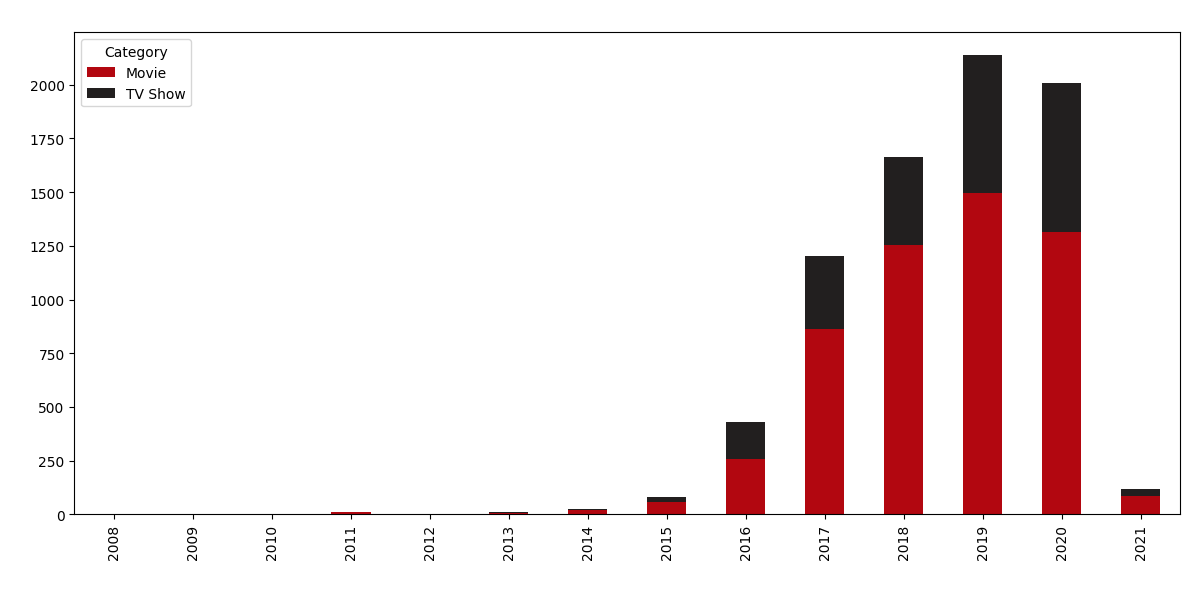

In [108]:
movies_tv = df.groupby(['year', 'category']).size().unstack(fill_value=0)
movies_tv.plot(kind='bar', stacked=True, color=[NETFLIX_RED, NETFLIX_BLACK], figsize=(12,6))
plt.title('Movies vs TV Shows Over the Years', color='white', fontsize=14)
plt.xlabel('Year', color='white')
plt.ylabel('Count', color='white')
plt.legend(title='Category')
plt.grid(False)
plt.tight_layout()
plt.show()

#### Top 15 Countries by Number of Titles

/tmp/ipython-input-995640058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.values, y=country_count.index, palette=[NETFLIX_RED]*15)


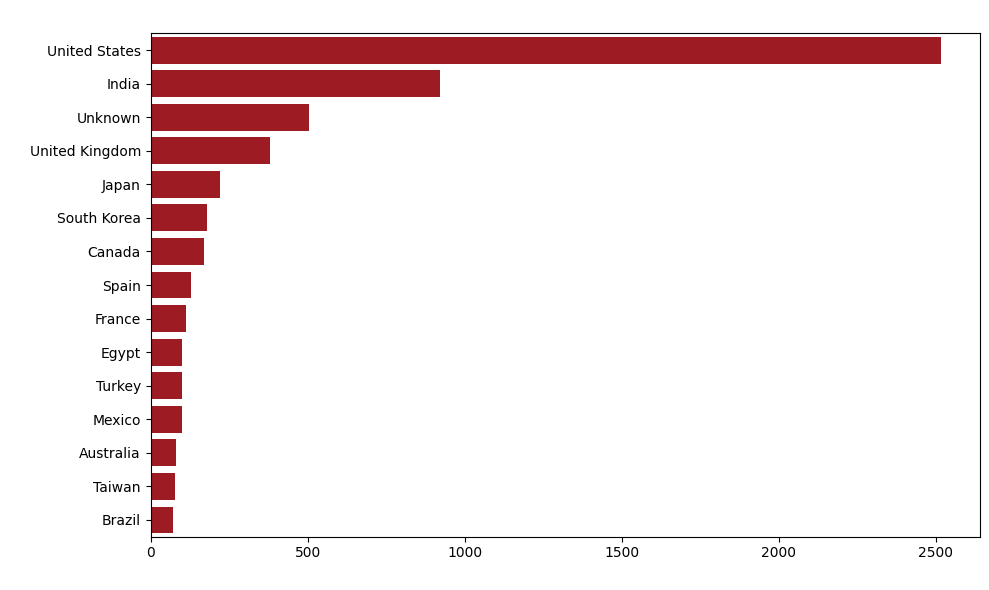

In [109]:
country_count = df['country'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=country_count.values, y=country_count.index, palette=[NETFLIX_RED]*15)
plt.title('Top 15 Countries by Number of Titles', color='white', fontsize=14)
plt.xlabel('Number of Titles', color='white')
plt.ylabel('Country', color='white')
plt.grid(False)
plt.tight_layout()
plt.show()

#### Ratings Distribution

/tmp/ipython-input-1240753319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette=[NETFLIX_RED]*10)
/tmp/ipython-input-1240753319.py:2: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette=[NETFLIX_RED]*10)


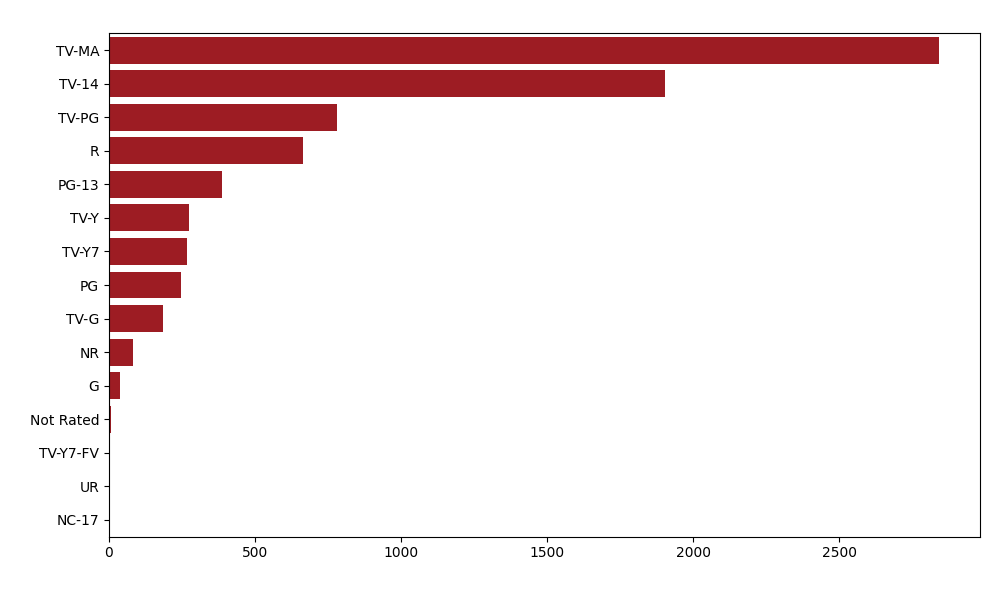

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette=[NETFLIX_RED]*10)
plt.title('Content Ratings Distribution', color='white', fontsize=14)
plt.xlabel('Count', color='white')
plt.ylabel('Rating', color='white')
plt.grid(False)
plt.tight_layout()
plt.show()

#### Word Analysis: Common Words in Type/Description (Optional Insight)

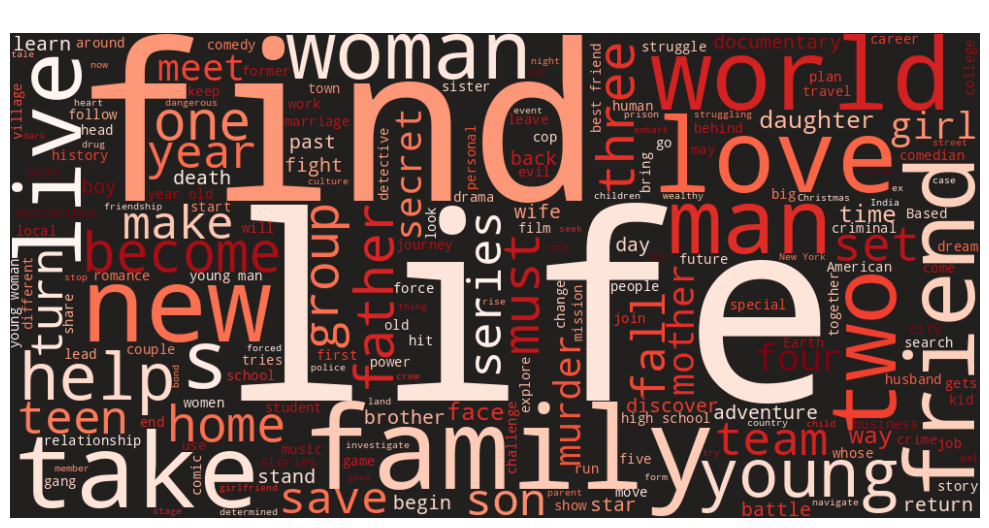

In [111]:
from collections import Counter
from wordcloud import WordCloud

text = " ".join(df['description'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color=NETFLIX_BLACK, colormap='Reds').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Descriptions', color='white', fontsize=14)
plt.tight_layout()
plt.show()

#### Summary Insights

In [112]:
print("\n📊 QUICK INSIGHTS:")
print(f"Total Movies: {len(df[df['category']=='Movie'])}")
print(f"Total TV Shows: {len(df[df['category']=='TV Show'])}")
print(f"Top Country: {df['country'].value_counts().idxmax()}")
print(f"Most Common Rating: {df['rating'].value_counts().idxmax()}")
print(f"Earliest Year: {int(df['year'].min())}, Latest Year: {int(df['year'].max())}")


📊 QUICK INSIGHTS:
Total Movies: 5377
Total TV Shows: 2312
Top Country: United States
Most Common Rating: TV-MA
Earliest Year: 2008, Latest Year: 2021
